# Quest04 기초통계

In [11]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from scipy import stats
from scipy.stats import uniform
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm # OLS 회귀 분석
from statsmodels.stats.stattools import durbin_watson # 독립성 검정

In [12]:
# Unicode warning 제거 (폰트관련 경고 메세지)
plt.rcParams['axes.unicode_minus']=False
# 한글 폰트 설정
plt.rcParams['font.family'] = "NanumGothic"

import warnings
warnings.filterwarnings('ignore')

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다.       
빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다.         
그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다.       
빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요.

In [13]:
# 표본크기가 작고 모집단의 표준편차를 모르므로 t 분포를 사용하여 신뢰구간을 구하고 가설검정을 수행

_avg = 495
_std = 10
n = 25
alpha = 0.05

# 통계량
t_statistic = (_avg - 500) / (_std / np.sqrt(n))
# 임계값
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df = n - 1))

print(t_statistic, p_value)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


-2.5 0.01965417511657863
t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

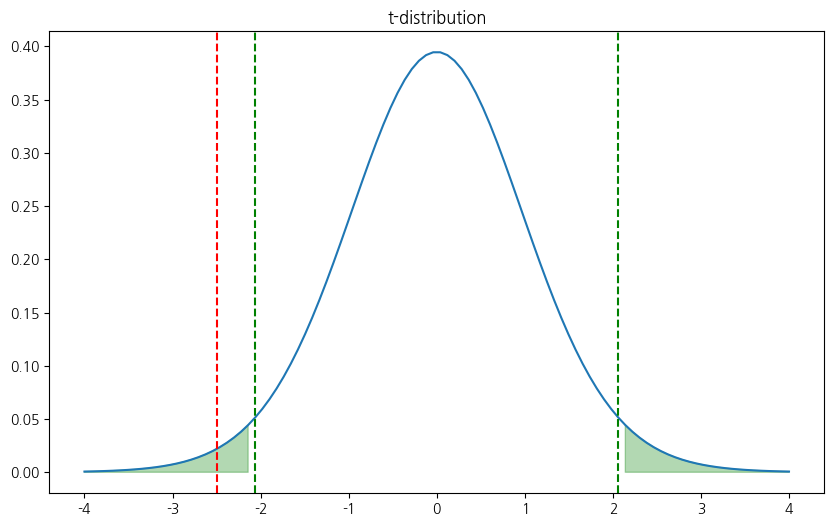

In [14]:
# 기각역
t_critical = t.ppf(1 - alpha / 2, df = n - 1)

# https://www.geeksforgeeks.org/matplotlib-pyplot-fill_between-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

plt.figure(figsize=(10, 6))
plt.title('t-distribution')
x = np.linspace(-4, 4, 100)
plt.plot(x, t.pdf(x, df = n-1))
plt.axvline(t_critical, color='green', linestyle='--')
plt.axvline(-t_critical, color='green', linestyle='--')
plt.axvline(t_statistic, color='red', linestyle='--')
plt.fill_between(x, t.pdf(x, df = n-1), where = (x >= t_critical) | (x <= -t_critical), color='green', alpha=0.3)
plt.show()

### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다.       
프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다.         
모집단의 표준편차는 알 수 없다고 합니다.        
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

In [15]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터

_n = 16 # 표본 크기
_avg = np.mean(sample_scores) # 표본 평균
_mean = 75 # 모평균
alpha = 0.05 # 유의수준
_std = np.std(sample_scores, ddof = 1)  # 표본 표준편차

In [16]:
# 단일 표본 t 검정, 단측검정

# 통계량
t_stat = (_avg - _mean) / (_std / np.sqrt(_n))
# 임계값
t_critical = t.ppf(1 - alpha, df = _n - 1)
# p-value
p_value = 1 - t.cdf(t_statistic, df = _n - 1)

t_stat, t_critical, p_value

(6.789028582272215, 1.7530503556925547, 0.9877470983767431)

In [17]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.9877. 유의수준 0.05에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다.        
연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.


>> 💡 관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  
>> `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요.              
>> 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.      

In [18]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

In [19]:
# 등분산성 검정 - Levene's test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

# 귀무가설 : 두 집단의 분산이 같다.
# 대립가설 : 두 집단의 분산이 다르다.
stat, p_val = stats.levene(group_A, group_B)
stat, p_val #(1.2856009170267175, 0.27026881992870333) => p_value > 0.05 이므로 귀무가설 채택

(1.2856009170267175, 0.27026881992870333)

In [20]:
# 독립 표본 t 검정
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var = True)
alpha = 0.05

In [21]:

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정
대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.     
(ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차)        
scipy.stats docs에서 적절한 함수를 찾아보고 적용해보세요.       
운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다.         
~~유의수준 5%~~에서 운동 프로그램이 체중 감소에 효과가 있는지 ~~대응 표본 t-검정~~을 실시하세요.        
또한, ~~대응표본t검정에서 등분산 검정이 필요한지 고민~~해봅시다.        

In [22]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

In [23]:
# 대응 표본 t 검정
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
t_stat, p_value = stats.ttest_rel(before, after)
alpha = 0.05

In [24]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


In [ ]:
"""대응 표본 t-검정에서 등분산 검정이 필요하지 않음
대응 표본 t-검정은 각 쌍의 차이를 계산하여 그 차이에 대한 t-검정을 수행하기 때문입니다.
즉, 동일한 대상에 대해 두 번의 측정을 하거나, 짝지어진 표본을 비교하는 분석이기 때문.

대응 표본 t-검정의 주요가정
1. 종속 변수는 연속형 변수여야 한다.
2. 각 쌍의 차이는 정규분포를 따라야 한다.
3. 각 쌍은 독립적이어야 한다.
4. 각 쌍의 차이들의 모집단 분산은 동일 해야 한다.
   => 잘 수행하지 않는데, 그 이유는 차이에 초점이 맞춰져 있기 때문. 
      또한 표본 크기가 작을 때, 등분산 검정의 검정력이 낮음 => 그래서 정규성 가정이 더 중요하게 여겨짐
"""

## Online Retail 

### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.      
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요.       
    표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [56]:
#%pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 2.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

Path to dataset files: /Users/kwonkyoungmi/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [26]:
df = retail.copy()
df['TotalPrice'] = df['Quantity'] * df['Price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
 8   TotalPrice   1067371 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 73.3+ MB


In [27]:
np.random.seed(42)
a = np.random.choice(df['TotalPrice'], size = 30, replace = False)
# np.random.seed(42)
b = np.random.choice(df['TotalPrice'], size = 100, replace = False)
# np.random.seed(42)
c = np.random.choice(df['TotalPrice'], size = 300, replace = False)

a_mean = np.mean(a)
b_mean = np.mean(b)
c_mean = np.mean(c)

print(f'Sample size : {a.size}, Mean TotalPrice: {a_mean:.2f}')
print(f'Sample size : {b.size}, Mean TotalPrice: {b_mean:.2f}')
print(f'Sample size : {c.size}, Mean TotalPrice: {c_mean:.2f}')

Sample size : 30, Mean TotalPrice: 24.19
Sample size : 100, Mean TotalPrice: 24.83
Sample size : 300, Mean TotalPrice: 19.91


### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요.         
    또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.     
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.    

In [28]:
# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = df['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 24.19, 95% CI: (9.141966810966027, 39.232033189033984)
Sample size: 100, Mean: 22.45, 95% CI: (13.103496650409372, 31.806503349590624)
Sample size: 300, Mean: 20.22, 95% CI: (13.640928169492387, 26.803738497174283)


In [29]:
stats.t.interval(0.95, df = len(a)-1, loc = np.mean(a), scale = stats.sem(a)) # stats.sem(a) => (mean, std_err)

(9.141966810966027, 39.232033189033984)

In [30]:
dt = [a,b,c]

for i in dt:
    result = stats.t.interval(0.95, df = len(i)-1, loc = np.mean(i), scale = stats.sem(i)) # stats.sem(a) => (mean, std_err)
    print(f"Sample size: {len(i)}, Mean: {np.mean(i):.2f}, 95% CI: {result}")

Sample size: 30, Mean: 24.19, 95% CI: (9.141966810966027, 39.232033189033984)
Sample size: 100, Mean: 24.83, 95% CI: (11.05020124479497, 38.61799875520503)
Sample size: 300, Mean: 19.91, 95% CI: (13.121090334782885, 26.696709665217114)


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요.      
    귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [31]:
df['Country'].value_counts() # "United Kingdom"  "Germany"
dt_uk = df[df['Country'] == 'United Kingdom']['TotalPrice']
dt_gm = df[df['Country'] == 'Germany']['TotalPrice']
alpha = 0.05

In [32]:
# 등분산성 검정
s, p = stats.levene(dt_uk, dt_gm)
print(f"statistic: {s}, p-value: {p}")

statistic: 0.44092975687404257, p-value: 0.5066741960065075


In [33]:
# 독립 이표본 t 검정
t_stat, p_value = stats.ttest_ind(dt_uk, dt_gm, equal_var = True)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -3.0761750785304067, p-value: 0.0020968035314750852


In [34]:
# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


## A/B Test

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다.         
패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다.      
패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.     

>페이지 A: 기존에 운영하던 패키지 판매 웹 페이지     
>페이지 B: 새롭게 생성한 패키지 판매 웹 페이지       

>두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.        

|| 노출 수 | 구매 수 |
|---|---|---|
|페이지 A| 1000 |80|
|페이지 B| 200| 22|

### **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

In [ ]:
# https://abtestguide.com/calc/?ua=1000&ub=200&ca=80&cb=22&tail=2

"""
패키지 기획자는 페이지 B효과에 대해 긍정적인 결론을 내릴 수 없다.

AB test guide의 결과 리포트에 따르면, 페이지 A의 전환율은 8%이고, 페이지 B의 전환율은 11%이다.
또한 페이지 A와 B의 전환율 차이는 3%로 나타났다. 하지만 표본의 크기가 매우 작기 때문에 차이는 우연에 의해 발생했을 가능성이 있다.
즉, 페이지 A와 페이지 B의 전환율 차이는 통계적으로 유의미하지 않다는 것이다.

AB test guide의 결과 리포트는 p-value는 0.2061로 0.05보다 크고, z-score는 1.2642로 1.96보다 작다고 보여준다.
이는 통계적으로 유의미하다고 보기 어려우며, 관찰된 차이가 우연히 발생했을 가능성이 높다는 것을 의미한다.

실제로 AB test guide의 리포트에서 표본비율 불일치 가능성 경고가 나왔다.
그러므로 추가적으로 표본을 수집하여 실험을 반복하거나, 더 많은 데이터를 수집하여 분석하는 것이 좋다.
표본을 증기시키는 구체적인 방법에는 테스트 기간을 연장하거나, 마케팅활동등을 강화하여 트래픽을 증가시키는 방법이 있다.

결론적으로 페이지 전화율이 3% 차이가 나지만, 표본의 크기가 작기 때문에 통계적으로 차이가 있다고 보기 어렵기 때문에
페이지 B의 효과에 대해 긍정적인 결론을 내릴 수 없다.
"""

# 추가) 카이제곱 검정 - 독립성 검정   
a = [80, 920]
b = [22,178]

obs = [a,b]
print(obs)

chi2_stat, p_val, dof, expected_values = stats.chi2_contingency(obs)

print(expected_values.round(3))
print(f"Chi-squared Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_val:.3f}") 
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")

# 유의수준/ 결론도출
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각 : 두 변수는 독립적이지 않다.")
else:
    print("귀무가설을 채택 : 두 변수는 독립적이다.")



[[80, 920], [22, 178]]
[[ 85. 915.]
 [ 17. 183.]]
Chi-squared Statistic: 1.562
P-value: 0.211
Degrees of Freedom: 1
Expected frequencies:
귀무가설을 기각 : 두 변수는 독립적이지 않다.


### **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

In [ ]:
# https://yozm.wishket.com/magazine/detail/1667/
# https://yozm.wishket.com/magazine/detail/1680/
"""
A/B 테스트에서 통계적 유의성을 확보하기 위해서는 표본 크기가 중요하며, 표본 크기가 클 수록 작은 차이도 유의미하게 감지할 수 있다.
이러한 경우에는 단순히 통계적 유의성만으로 의사결정을 내리기 어려우며, 다른 지표들 또한 고려하여 종합적으로 의사결정을 내려야 한다.

A/B테스트에서는 표본 크기가 클수록 그룹 A와 그룹 B의 결과 차이가 적더라도 유읨하다고 판단할 수 있다.
이는 표본이 클수록 모집단의 크기에 가까워져 추측이 정확해지고, A와 B의 차이가 우연에 의해 발생할 가능성이 줄어들기 때문이다.
표본이 작으면 결과 차이가 유의미한지 판단하기 어렵지만 표본만 충분하다면 판단이 가능하다.
두 그룹의 작은 차이라도 표본이 크면 유의미한 결과를 얻을 수 있다는 것이다.

그러므로 충분한 표본으로 수행한 A/B 테스트에서 효과의 차이 자체가 매우 작다면, 다른 요소를 고려하여 종합적으로 고려해 의사결정을 내리는 것이 좋다.

예를 들어, 한 구독 기반 스트리밍 서비스 기업이 신규 유저 가입 유도 문구를 A/B안 2가지로 나누어 테스트를 진행하였고, 
수십만명의 사용자 데이터를 기번으로 분석한 결과 B 전환율이 0.07% 더 높게 나왔고, 통계적으로 유의미한 결과였다고 하자.
하지만 실제 의사결정에는 단순한 전환율 이외에도 다른 요소들이 함께 고려될 필요가 있다.
신규 가입유도 메세지가 브랜드 메세지와 일치하는지, 고객의 경험을 해치지 않는지, 장기적인 관점에서 고객의 충성도에 미치는 영향은 없는지, 
마케팅 채널별(이메일 캠페인, 앱 푸시, 웹사이트) 차이는 없었는지, 전환 이후 유지율은 어떻게 되는 지등 다양한 요소를 고려해야 한다.

따라서 A/B 테스트에서 통계적 유의성이 확보 되었다 하더라도, 효과의 크기가 작은경우, 단순 수치 이상의 맥락을 함께 고려하여 의사결정하는 것이 중요하다고 하겠다.
"""

## 회고

이건 거의 글짓기 대회 수준의 작문 실력 능력이 필요한 과제네요.

keep : 배울 수 있을 때 항상 잘 배우려는 자세를 놓지지 않았다.       
IELTs writing part 1 말늘리기 실력이 과제 9번에서 발휘되는 것을 보며 무엇이든 열심히 해 두면 어딘가 써먹을 때가 있구나 싶었다.      

Problem : 처음에 기억이 너무 나지 않아서 좀 막막했는데, 코드에 집중된 생각을 하다보니 무엇을 해야 한다 결정되었을 때 해야 할 것들만 기억하고 있다는 생각이 들었다.
왜 해도해도 생경한지 모르겠지만, 생경해서 그렇다는 것은 알겠지만, 이쯤 했으면 알 때되 된거 같은데... 이건 좀 문제가 아닌가 싶다.        

Try : 문제에 답을 찾기 위해 관련한 사레를 생각했어야 하는데, 관련 도메인 지식이 없고 고민해 본적이 없다보니, GPT와 대화가 길었다. 여러 도메인 지식과 니즈를 파악하고 알 필요가 있는 듯 하다.